In [31]:
import pandas as pd
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [14]:
df = pd.read_csv('data/train.csv')
df.head()

,Unnamed: 0,text,author
0,0,"Hardy, Thomas Sutton,\nChristopher Moody_, an...",defoe
1,1,To the vest was a\ngirdle five or six inches ...,defoe
2,2,"\n\nAmy was concerned at it as well as I, but ...",defoe
3,3,"""Well,"" said I, ""thou art very kind, but this...",defoe
4,4,"\n\n“Now, Friday,” says I, laying down the dis...",defoe


In [16]:
df = df.drop('Unnamed: 0',axis=1)

#### Check dataset size

In [8]:
df.shape

(40000, 3)

#### Class distribution

In [10]:
df['author'].value_counts()

defoe      10000
dickens    10000
doyle      10000
twain      10000
Name: author, dtype: int64

#### Check for Nans

In [18]:
df.dropna()

,text,author
0,"Hardy, Thomas Sutton,\nChristopher Moody_, an...",defoe
1,To the vest was a\ngirdle five or six inches ...,defoe
2,"\n\nAmy was concerned at it as well as I, but ...",defoe
3,"""Well,"" said I, ""thou art very kind, but this...",defoe
4,"\n\n“Now, Friday,” says I, laying down the dis...",defoe
...,...,...
39995,The Prince continued\nto struggle for freedo...,twain
39996,“Are you so unobservant as not to have\nfound...,twain
39997,Have at thee!”\n\nThey took their lath swords...,twain
39998,"But the vast ruin will still stand for ages,...",twain


> No Nans in the training dataset

#### Word count distribution

In [19]:
df['word_count'] = df.text.apply(lambda x: len(word_tokenize(x)))

In [21]:
df.word_count.describe()

count    40000.000000
mean        68.427025
std         29.659818
min         15.000000
25%         51.000000
50%         60.000000
75%         76.000000
max        657.000000
Name: word_count, dtype: float64

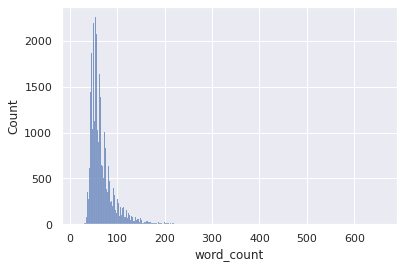

In [36]:
sns.histplot(x='word_count',data=df)
plt.show()

In [40]:
df.groupby('author').describe()

word_count                                                    
             count     mean        std   min   25%   50%    75%    max
author                                                                
defoe      10000.0  85.8651  40.623145  19.0  57.0  75.0  102.0  418.0
dickens    10000.0  65.0014  21.332639  15.0  52.0  60.0   72.0  630.0
doyle      10000.0  56.5106  12.779171  26.0  47.0  54.0   63.0  158.0
twain      10000.0  66.3310  28.074766  31.0  50.0  59.0   73.0  657.0

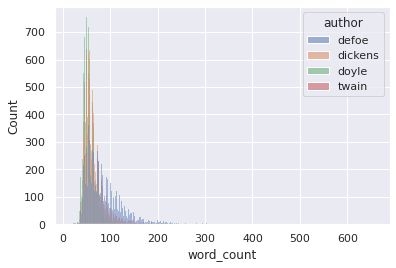

In [39]:
sns.histplot(x='word_count',data=df,hue='author')
plt.show()